# Libraries

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.cluster import KMeans
from IPython.display import display
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.utils import shuffle
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [49]:
import warnings
from IPython.utils import io
def warn(*args, **kwargs):
    pass
warnings.warn = warn

# Load the dataset

In [50]:
with io.capture_output() as captured:
  data=pd.read_csv("/content/gun-violence-data_01-2013_03-2018.csv")
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


## Columns

In [51]:
cols=data.columns.tolist()
cols

['incident_id',
 'date',
 'state',
 'city_or_county',
 'address',
 'n_killed',
 'n_injured',
 'incident_url',
 'source_url',
 'incident_url_fields_missing',
 'congressional_district',
 'gun_stolen',
 'gun_type',
 'incident_characteristics',
 'latitude',
 'location_description',
 'longitude',
 'n_guns_involved',
 'notes',
 'participant_age',
 'participant_age_group',
 'participant_gender',
 'participant_name',
 'participant_relationship',
 'participant_status',
 'participant_type',
 'sources',
 'state_house_district',
 'state_senate_district']

## Handle missing data (imputation, dropping rows/columns)

*Imputation*

In [52]:
numCols = ['n_killed', 'n_injured', 'latitude', 'longitude', 'n_guns_involved']
data[numCols] = data[numCols].fillna(data[numCols].mean())
catCols = ['state', 'city_or_county', 'gun_stolen', 'gun_type', 'incident_characteristics']
data[catCols] = data[catCols].fillna(data[catCols].mode().iloc[0])

*Dropping Column*

In [53]:
dfDropna = data.dropna()
dfDropnaColumns = data.dropna(axis=1)

Result

In [54]:
print("Summary statistics after handling missing data:")
print("Number of rows before dropping:", len(data))
print("Number of rows after dropping:", len(dfDropna))
print("Number of columns before dropping:", len(data.columns))
print("Number of columns after dropping:", len(dfDropnaColumns.columns))

Summary statistics after handling missing data:
Number of rows before dropping: 239677
Number of rows after dropping: 1279
Number of columns before dropping: 29
Number of columns after dropping: 14


## Data cleaning and normalization (r)

Remove duplicates

In [55]:
dfduplicates = dfDropna.drop_duplicates()

Remove outliers using IQR

In [56]:
def removeOutliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_no_outliers
numerical_columns = ['n_killed', 'n_injured', 'latitude', 'longitude', 'n_guns_involved']
for column in numerical_columns:
    data_no_outliers = removeOutliers(dfduplicates, column)

Normalization using minmax scaling

In [57]:
scaler = MinMaxScaler()
numerical_columns = ['n_killed', 'n_injured', 'latitude', 'longitude', 'n_guns_involved']
data_normalized = data_no_outliers.copy()
data_normalized[numerical_columns] = scaler.fit_transform(data_no_outliers[numerical_columns])

Result

In [58]:
stats = data_normalized.describe()
print("Summary statistics after all data cleaning and normalization:")
print(stats)
numRows, numCols = data_normalized.shape
print("\n\nNumber of rows:", numRows)
print("Number of columns:", numCols)

Summary statistics after all data cleaning and normalization:
        incident_id     n_killed    n_injured  congressional_district  \
count  1.165000e+03  1165.000000  1165.000000             1165.000000   
mean   6.958738e+05     0.121888     0.042489                8.740773   
std    2.232981e+05     0.134576     0.067209                8.944642   
min    9.301600e+04     0.000000     0.000000                0.000000   
25%    5.119130e+05     0.000000     0.000000                3.000000   
50%    7.225700e+05     0.166667     0.000000                6.000000   
75%    8.749490e+05     0.166667     0.083333               11.000000   
max    1.082552e+06     1.000000     1.000000               53.000000   

          latitude    longitude  n_guns_involved  state_house_district  \
count  1165.000000  1165.000000      1165.000000           1165.000000   
mean      0.369101     0.760212         0.187983             58.400000   
std       0.134488     0.159871         0.390866          

## Engineer new features (R)

filter-based method

new feature: total_victims (summing up n_killed and n_injured column values)

In [59]:
corMatrix = data_normalized[numerical_columns].corr()
corWithTarget = corMatrix['n_killed'].abs().sort_values(ascending=False)
k = 3
top_features = corWithTarget.head(k).index.tolist()
data_normalized['total_victims'] = (data_normalized['n_killed'] + data_normalized['n_injured']).round().astype(int)

In [60]:
print("First few rows of the dataset with the new engineered feature:")
display(data_normalized.head())
print("\nCorrelation Matrix:")
display(corMatrix)
print("\nTop Features Correlated with 'n_killed':")
display(corWithTarget.head(k))

First few rows of the dataset with the new engineered feature:


,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,total_victims
36,482856,2013-03-13,New York,Mohawk,17 W Main St,1.000000,0.166667,http://www.gunviolencearchive.org/incident/482856,http://www.syracuse.com/news/index.ssf/2013/03...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||4::Male||5::Male||6...,0::Harry Montgomery||1::Michael Ransear||2::Jo...,7::Aquaintance,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/upstate-new-york-s...,101.0,51.0,1
83,486623,2013-05-23,Tennessee,Bean Station,1034 Main Street,0.333333,0.166667,http://www.gunviolencearchive.org/incident/486623,http://legacy.wbir.com/story/news/local/hamble...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||3::Female||4::Male,0::Stephen Lovell||1::Richard Alexander Sommer...,4::Armed Robbery,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.dailymail.co.uk/news/article-233016...,35.0,8.0,0
101,487833,2013-06-15,Tennessee,Nashville,135 Brinkhaven Ave,0.000000,0.333333,http://www.gunviolencearchive.org/incident/487833,http://www.timesfreepress.com/news/local/story...,False,...,0::Adult 18+||1::Teen 12-17||2::Teen 12-17||3:...,0::Female||1::Female||2::Female||3::Female||4:...,0::Nicole Luke||1::Keona Luke||2::Deona Luke||...,4::Significant others - current or former,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.usatoday.com/story/news/nation/2013...,51.0,19.0,0
118,490150,2013-06-29,South Carolina,North Charleston,4400 Dorchester Road; Suite 115,0.500000,0.083333,http://www.gunviolencearchive.org/incident/490150,http://www.ksla.com/story/23146180/attorneys-f...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Maurice Lamark Horry||1::Carlos Davis||2::T...,4::Gang vs Gang||5::Gang vs Gang,0::Killed||1::Killed||2::Killed||3::Injured||4...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.wistv.com/story/22722475/police-res...,109.0,42.0,1
200,480521,2013-09-19,Illinois,Chicago,1809 W 50th St,0.000000,1.000000,http://www.gunviolencearchive.org/incident/480521,http://www.nydailynews.com/news/national/chica...,False,...,0::Child 0-11||1::Teen 12-17||2::Teen 12-17||3...,0::Male||1::Female||2::Male||3::Male||4::Male|...,0::Deonta Howard||13::Quinton M. Humphries||14...,13::Gang vs Gang||14::Gang vs Gang||15::Gang v...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.chicagotribune.com/news/local/break...,2.0,1.0,1



Correlation Matrix:


,n_killed,n_injured,latitude,longitude,n_guns_involved
n_killed,1.000000,-0.251194,-0.021632,-0.067680,-0.016772
n_injured,-0.251194,1.000000,-0.043164,0.057605,0.022724
latitude,-0.021632,-0.043164,1.000000,0.003880,-0.121615
longitude,-0.067680,0.057605,0.003880,1.000000,0.028289
n_guns_involved,-0.016772,0.022724,-0.121615,0.028289,1.000000



Top Features Correlated with 'n_killed':


n_killed     1.000000
n_injured    0.251194
longitude    0.067680
Name: n_killed, dtype: float64

Wrapper-based
methods

new feature: primary_cause_factor (new feature created based on the top-ranked feature selected by RFE)

In [61]:
X = data_normalized[numerical_columns]
y = data_normalized['n_killed']
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=1)
rfe.fit(X, y)
featureRanking = rfe.ranking_
topFeatureIndex = featureRanking.argmin()
topFeatureName = X.columns[topFeatureIndex]
data_normalized['primary_cause_factor'] = data_normalized[topFeatureName]

In [62]:
print("First few rows of the dataset with the new engineered feature based on Recursive Feature Elimination(RFE):")
display(data_normalized.head())
print("\nCorrelation Matrix:")
display(corMatrix)
print("\nTop Features Correlated with 'n_killed':")
display(corWithTarget.head(k))

First few rows of the dataset with the new engineered feature based on Recursive Feature Elimination(RFE):


,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,total_victims,primary_cause_factor
36,482856,2013-03-13,New York,Mohawk,17 W Main St,1.000000,0.166667,http://www.gunviolencearchive.org/incident/482856,http://www.syracuse.com/news/index.ssf/2013/03...,False,...,0::Male||1::Male||2::Male||4::Male||5::Male||6...,0::Harry Montgomery||1::Michael Ransear||2::Jo...,7::Aquaintance,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/upstate-new-york-s...,101.0,51.0,1,1.000000
83,486623,2013-05-23,Tennessee,Bean Station,1034 Main Street,0.333333,0.166667,http://www.gunviolencearchive.org/incident/486623,http://legacy.wbir.com/story/news/local/hamble...,False,...,0::Male||1::Male||2::Female||3::Female||4::Male,0::Stephen Lovell||1::Richard Alexander Sommer...,4::Armed Robbery,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.dailymail.co.uk/news/article-233016...,35.0,8.0,0,0.333333
101,487833,2013-06-15,Tennessee,Nashville,135 Brinkhaven Ave,0.000000,0.333333,http://www.gunviolencearchive.org/incident/487833,http://www.timesfreepress.com/news/local/story...,False,...,0::Female||1::Female||2::Female||3::Female||4:...,0::Nicole Luke||1::Keona Luke||2::Deona Luke||...,4::Significant others - current or former,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.usatoday.com/story/news/nation/2013...,51.0,19.0,0,0.000000
118,490150,2013-06-29,South Carolina,North Charleston,4400 Dorchester Road; Suite 115,0.500000,0.083333,http://www.gunviolencearchive.org/incident/490150,http://www.ksla.com/story/23146180/attorneys-f...,False,...,0::Male||1::Male||2::Male||3::Male||4::Male||5...,0::Maurice Lamark Horry||1::Carlos Davis||2::T...,4::Gang vs Gang||5::Gang vs Gang,0::Killed||1::Killed||2::Killed||3::Injured||4...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.wistv.com/story/22722475/police-res...,109.0,42.0,1,0.500000
200,480521,2013-09-19,Illinois,Chicago,1809 W 50th St,0.000000,1.000000,http://www.gunviolencearchive.org/incident/480521,http://www.nydailynews.com/news/national/chica...,False,...,0::Male||1::Female||2::Male||3::Male||4::Male|...,0::Deonta Howard||13::Quinton M. Humphries||14...,13::Gang vs Gang||14::Gang vs Gang||15::Gang v...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.chicagotribune.com/news/local/break...,2.0,1.0,1,0.000000



Correlation Matrix:


,n_killed,n_injured,latitude,longitude,n_guns_involved
n_killed,1.000000,-0.251194,-0.021632,-0.067680,-0.016772
n_injured,-0.251194,1.000000,-0.043164,0.057605,0.022724
latitude,-0.021632,-0.043164,1.000000,0.003880,-0.121615
longitude,-0.067680,0.057605,0.003880,1.000000,0.028289
n_guns_involved,-0.016772,0.022724,-0.121615,0.028289,1.000000



Top Features Correlated with 'n_killed':


n_killed     1.000000
n_injured    0.251194
longitude    0.067680
Name: n_killed, dtype: float64

## Split data into train and test sets (r)

In [63]:
# features
X = data_normalized.drop(['n_killed'], axis=1)
# target variable
y = data_normalized['n_killed']
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of training set (X_train):", X_train.shape)
print("Shape of testing set (X_test):", X_test.shape)
print("Shape of training set (y_train):", y_train.shape)
print("Shape of testing set (y_test):", y_test.shape)

Shape of training set (X_train): (932, 30)
Shape of testing set (X_test): (233, 30)
Shape of training set (y_train): (932,)
Shape of testing set (y_test): (233,)


## Regression models (linear) (r)

Model training

In [64]:
X_train_numeric = X_train.select_dtypes(include=['number'])
print("Shape of numeric training data:", X_train_numeric.shape)
model = LinearRegression()
model.fit(X_train_numeric, y_train)
print("\nModel Coefficients:", model.coef_)
print("\nModel Intercept:", model.intercept_)

Shape of numeric training data: (932, 10)

Model Coefficients: [-2.28735740e-22 -3.65809813e-16  2.20364092e-17  5.63850690e-15
  6.38642513e-16  1.84233054e-16  3.25260652e-18 -1.49619900e-17
  2.21854128e-16  1.00000000e+00]

Model Intercept: -2.4424906541753444e-15


Evaluation

In [65]:
X_test_numeric = X_test.select_dtypes(include=['number'])
y_pred = model.predict(X_test_numeric)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 6.079455536189233e-16
Mean Squared Error (MSE): 5.403867987383184e-31
R-squared (R2): 1.0


Hyper Parameter Tuning for Ridge Regression using GridSearchCV

In [66]:
ridge_model = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_numeric, y_train)
best_alpha = grid_search.best_params_['alpha']
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train_numeric, y_train)
y_pred = best_model.predict(X_test_numeric)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with tuned Ridge Regression:", mse)

Mean Squared Error with tuned Ridge Regression: 1.1434671600931734e-10


## Tree-based models (random forests) (r)

Model Training

In [67]:
subset_size = 1000
subset_data = data.sample(n=subset_size, random_state=42)
X = subset_data.drop(['incident_id', 'date', 'state', 'city_or_county', 'address', 'incident_url', 'source_url',
                      'incident_url_fields_missing', 'notes', 'sources', 'participant_name', 'n_killed'], axis=1)
X = pd.get_dummies(X)
y = subset_data['n_killed']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
randomForestModel = RandomForestClassifier()
randomForestModel.fit(X_train, y_train)

RandomForestClassifier()

Evaluation

In [68]:
y_pred_rf = randomForestModel.predict(X_test)
confusionMatrix_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
sensitivity_rf = recall_rf
specificity_rf = confusionMatrix_rf[0,0] / (confusionMatrix_rf[0,0] + confusionMatrix_rf[0,1])
print("Random Forest Metrics:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Sensitivity:", sensitivity_rf)
print("Specificity:", specificity_rf)
print("Confusion Matrix:")
print(confusionMatrix_rf)

Random Forest Metrics:
Precision: 0.9154134897360703
Recall: 0.925
Sensitivity: 0.925
Specificity: 1.0
Confusion Matrix:
[[141   0   0   0]
 [  9  43   0   0]
 [  3   0   1   0]
 [  2   1   0   0]]


Hyper Parameter Tuning using GridSearchCV

In [69]:
parameterGrid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
gridSearch_rf = GridSearchCV(randomForestModel, parameterGrid_rf, cv=5)
gridSearch_rf.fit(X_train, y_train)
bestParameters_rf = gridSearch_rf.best_params_
print("Best Parameters:", bestParameters_rf)
bestRandomForestModel = RandomForestClassifier(**bestParameters_rf)
bestRandomForestModel.fit(X_train, y_train)
y_pred_tuned_rf = bestRandomForestModel.predict(X_test)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
precision_tuned_rf = precision_score(y_test, y_pred_tuned_rf, average='weighted')
recall_tuned_rf = recall_score(y_test, y_pred_tuned_rf, average='weighted')
confusionMatrix_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)
sensitivity_tuned_rf = recall_tuned_rf
specificity_tuned_rf = confusionMatrix_tuned_rf[0, 0] / (confusionMatrix_tuned_rf[0, 0] + confusionMatrix_tuned_rf[0, 1])
print("Random Forest Metrics (after tuning):")
print("Accuracy:", accuracy_tuned_rf)
print("Precision:", precision_tuned_rf)
print("Recall:", recall_tuned_rf)
print("Sensitivity:", sensitivity_tuned_rf)
print("Specificity:", specificity_tuned_rf)
print("Confusion Matrix:")
print(confusionMatrix_tuned_rf)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Metrics (after tuning):
Accuracy: 0.83
Precision: 0.8280285714285713
Recall: 0.83
Sensitivity: 0.83
Specificity: 1.0
Confusion Matrix:
[[141   0   0   0]
 [ 27  25   0   0]
 [  4   0   0   0]
 [  3   0   0   0]]


## Clustering algorithms (k-means)

In [70]:
imputer = SimpleImputer(strategy='mean')
numeric_columns = data.select_dtypes(include=np.number)
subset = shuffle(numeric_columns).iloc[:1000]
subset_imputed = imputer.fit_transform(subset)
kmeans_sampled = KMeans(n_clusters=3, random_state=42)
kmeans_sampled.fit(subset_imputed)
cluster_labels_sampled = kmeans_sampled.labels_
print("\nCluster labels for the first 500 data points:")
print(cluster_labels_sampled[:500])
print("\nCentroids of the clusters:")
print(kmeans_sampled.cluster_centers_)


Cluster labels for the first 500 data points:
[1 1 0 0 0 2 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 2 1 0 0 2 1 2 2 0 0 0 0 1 2 2
 1 0 1 2 1 0 1 0 1 2 0 1 1 0 0 1 2 2 2 2 0 1 0 0 0 2 2 1 2 0 0 2 1 2 1 0 2
 0 1 0 2 2 1 0 1 1 0 1 2 2 1 2 0 0 2 2 2 0 1 0 0 0 2 2 1 1 1 0 2 0 1 2 1 2
 2 2 1 1 0 1 2 0 1 2 1 1 2 2 0 1 2 2 0 0 2 2 2 2 1 0 1 2 2 2 1 1 0 0 1 1 2
 2 2 0 1 0 0 0 0 0 1 0 0 2 1 2 2 2 2 2 1 1 1 2 1 1 1 2 2 0 1 0 2 1 0 0 2 2
 1 0 1 1 2 1 2 1 1 1 2 2 0 0 2 0 2 0 1 0 2 0 0 1 1 2 0 0 1 1 2 0 2 0 1 2 2
 2 2 0 0 1 0 1 0 0 0 1 2 2 1 2 0 1 0 2 1 1 0 0 2 1 1 2 2 2 1 1 2 2 1 2 1 0
 2 2 0 0 0 0 1 2 1 1 0 1 0 0 1 0 2 1 2 2 0 2 2 2 2 2 1 2 2 1 0 1 1 0 0 1 1
 2 2 2 0 0 2 2 0 2 1 0 0 1 1 2 2 0 1 0 0 1 2 0 2 0 2 2 0 1 1 1 0 0 1 1 0 2
 2 0 0 2 1 0 0 0 0 0 0 0 2 1 0 0 1 0 1 2 2 0 1 2 0 0 1 2 2 1 2 0 1 0 1 1 2
 0 1 2 0 0 0 2 0 2 0 1 2 2 1 1 1 2 1 1 2 0 2 0 1 2 0 1 0 2 2 0 1 1 2 2 1 0
 1 2 1 0 0 2 2 0 2 1 1 0 0 0 1 1 1 2 1 0 0 0 1 1 0 1 2 0 0 0 2 0 2 0 2 2 0
 2 0 1 1 2 1 2 0 0 0 2 1 1 0 0 0 2 0 0 0 0 1 1 2 2 2 

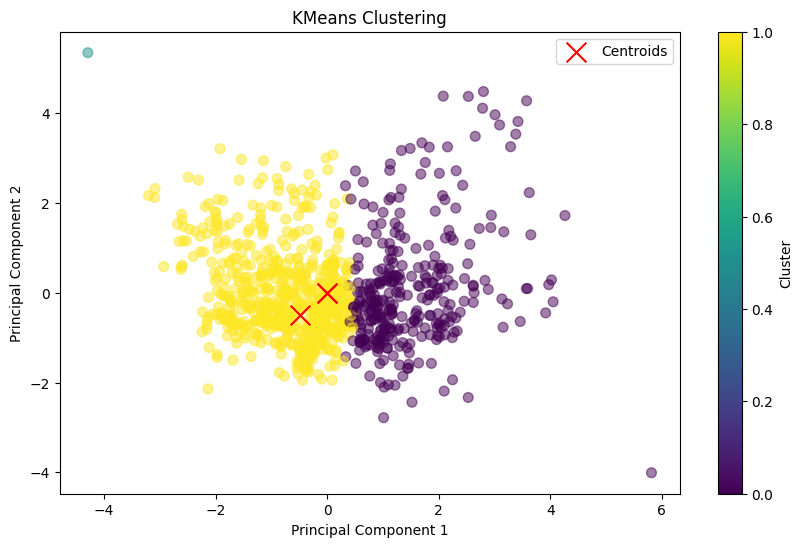

In [71]:
n_clusters = 3
imputer = SimpleImputer(strategy='mean')
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
numeric_columns = data.select_dtypes(include=np.number)
subset = shuffle(numeric_columns).iloc[:1000]
subset_imputed = imputer.fit_transform(subset)
scaler = StandardScaler()
subset_scaled = scaler.fit_transform(subset_imputed)
kmeans.fit(subset_scaled)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
pca = PCA(n_components=2)
subset_pca = pca.fit_transform(subset_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(subset_pca[:, 0], subset_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

Cluster evaluation metrics

In [72]:
silhouette_avg_sampled = silhouette_score(subset_imputed, cluster_labels_sampled)
print("Silhouette Score:", silhouette_avg_sampled)
davies_bouldin_sampled = davies_bouldin_score(subset_imputed, cluster_labels_sampled)
print("Davies-Bouldin Index:", davies_bouldin_sampled)
calinski_harabasz_sampled = calinski_harabasz_score(subset_imputed, cluster_labels_sampled)
print("Calinski-Harabasz Index:", calinski_harabasz_sampled)
inertia_sampled = kmeans_sampled.inertia_
print("Inertia:", inertia_sampled)

Silhouette Score: -0.024791059816158298
Davies-Bouldin Index: 62.45285526553181
Calinski-Harabasz Index: 1.7552647601833742
Inertia: 8909043141481.84


## Association rule mining (apriori algorithm) (r)

In [73]:
columns = ["incident_id", "date", "state", "city_or_county", "address", "n_killed", "n_injured",
           "incident_url", "source_url", "incident_url_fields_missing", "congressional_district",
           "gun_stolen", "gun_type", "incident_characteristics", "latitude", "location_description",
           "longitude", "n_guns_involved", "notes", "participant_age", "participant_age_group",
           "participant_gender", "participant_name", "participant_relationship", "participant_status",
           "participant_type", "sources", "state_house_district", "state_senate_district"]

df = pd.read_csv('/content/gun-violence-data_01-2013_03-2018.csv', header=None, names=columns, nrows=1000)
selected_df = df[['state', 'city_or_county', 'incident_characteristics', 'participant_age_group', 'participant_gender']]
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(selected_df).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(selected_df.columns))
min_support = 0.05
min_confidence = 0.7
frequent_itemsets = apriori(encoded_df, min_support=min_support, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
print("Top 7 rules based on confidence:")
for i, (_, row) in enumerate(rules.nlargest(10, "confidence").iterrows(), start=1):
    antecedent = row['antecedents']
    consequent = row['consequents']
    confidence = row['confidence']
    print(f"Rule {i}: If {antecedent} then {consequent} (Confidence: {confidence:.2f})")

Top 7 rules based on confidence:
Rule 1: If frozenset({'participant_gender_0::Male', 'incident_characteristics_Shot - Wounded/Injured'}) then frozenset({'participant_age_group_0::Adult 18+'}) (Confidence: 0.89)
Rule 2: If frozenset({'participant_gender_0::Male'}) then frozenset({'participant_age_group_0::Adult 18+'}) (Confidence: 0.87)
Rule 3: If frozenset({'participant_age_group_0::Adult 18+'}) then frozenset({'participant_gender_0::Male'}) (Confidence: 0.84)
Rule 4: If frozenset({'participant_gender_0::Male||1::Male'}) then frozenset({'participant_age_group_0::Adult 18+||1::Adult 18+'}) (Confidence: 0.84)
Rule 5: If frozenset({'participant_age_group_0::Adult 18+', 'incident_characteristics_Shot - Wounded/Injured'}) then frozenset({'participant_gender_0::Male'}) (Confidence: 0.80)
Rule 6: If frozenset({'participant_gender_nan'}) then frozenset({'participant_age_group_nan'}) (Confidence: 0.80)
Rule 7: If frozenset({'participant_age_group_nan'}) then frozenset({'participant_gender_nan'}

Visualization

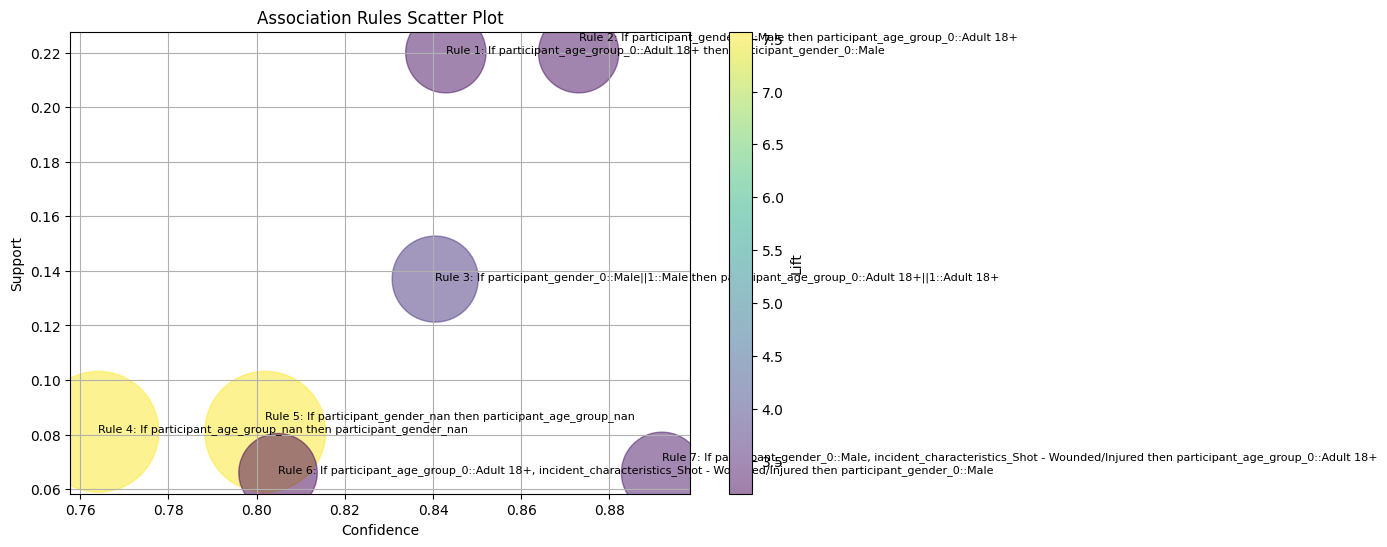

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['support'], s=rules['lift']*1000, alpha=0.5, c=rules['lift'], cmap='viridis')
plt.xlabel('Confidence')
plt.ylabel('Support')
plt.title('Association Rules Scatter Plot')
plt.colorbar(label='Lift')
plt.grid(True)
def adjust_y_coord(y_coord, num_overlapping):
    offset = 0.005 * num_overlapping
    return y_coord + offset
annotated_y_coords = []
for i, (_, row) in enumerate(rules.iterrows(), start=1):
    antecedent = ', '.join(row['antecedents'])
    consequent = ', '.join(row['consequents'])
    confidence = row['confidence']
    support = row['support']
    num_overlapping = annotated_y_coords.count(support)
    adjusted_y_coord = adjust_y_coord(support, num_overlapping)
    annotated_y_coords.append(adjusted_y_coord)
    plt.text(confidence, adjusted_y_coord, f"Rule {i}: If {antecedent} then {consequent}", fontsize=8)
plt.show()

## Time series analysis and forecasting (ARIMA, etc.) (r)

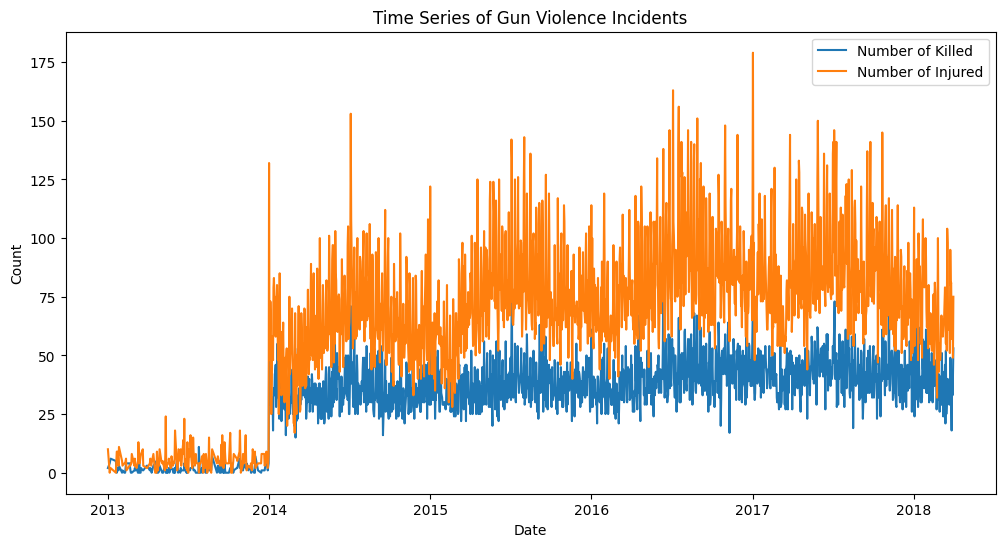



Root Mean Squared Error (RMSE): 10.42


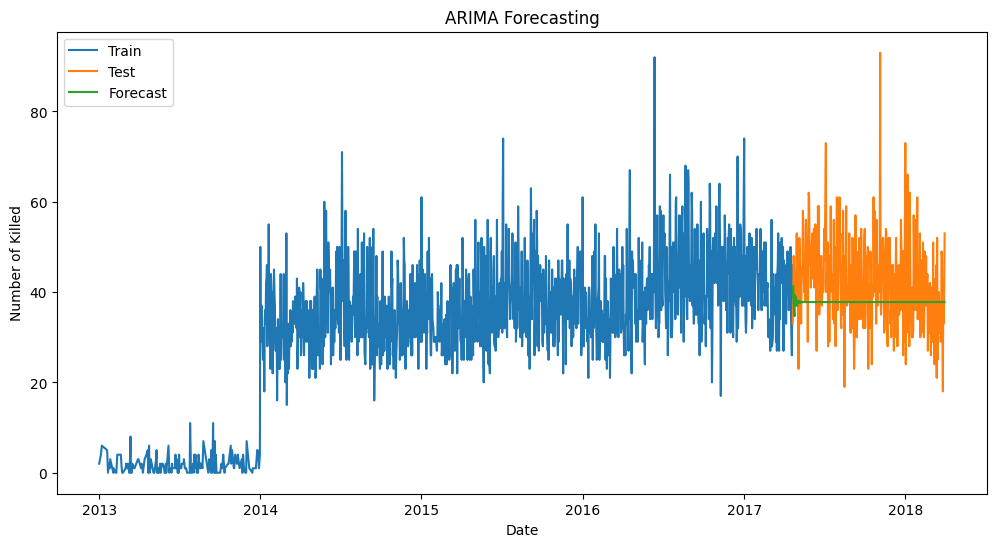

In [75]:
data['date'] = pd.to_datetime(data['date'])
time_series_data = data.groupby('date')[['n_killed', 'n_injured']].sum()
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['n_killed'], label='Number of Killed')
plt.plot(time_series_data.index, time_series_data['n_injured'], label='Number of Injured')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series of Gun Violence Incidents')
plt.legend()
plt.show()
train_size = int(len(time_series_data) * 0.8)
train, test = time_series_data.iloc[:train_size], time_series_data.iloc[train_size:]
model = ARIMA(train['n_killed'], order=(5,1,0))
fitted_model = model.fit()
forecast = fitted_model.forecast(steps=len(test))
rmse = np.sqrt(mean_squared_error(test['n_killed'], forecast))
print(f'\n\nRoot Mean Squared Error (RMSE): {rmse:.2f}')
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['n_killed'], label='Train')
plt.plot(test.index, test['n_killed'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Killed')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

Grid search CV module (r)

to choose hyperparameters for models e.g: knn


In [76]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_model = KNeighborsRegressor(n_neighbors=5)
print("Number of samples in X_train_numeric:", len(X_train_numeric))
print("Number of samples in y_train:", len(y_train))
min_samples = min(len(X_train_numeric), len(y_train))
X_train_numeric = X_train_numeric[:min_samples]
y_train = y_train[:min_samples]
X_train_numeric, X_test_numeric, y_train, y_test = train_test_split(X_train_numeric, y_train, test_size=0.2, random_state=42)
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_numeric, y_train)
best_params = grid_search.best_params_
best_knn_model = KNeighborsRegressor(**best_params)
best_knn_model.fit(X_train_numeric, y_train)
y_pred = best_knn_model.predict(X_test_numeric)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error with GridSearchCV KNN:", mse)

Number of samples in X_train_numeric: 932
Number of samples in y_train: 800

Mean Squared Error with GridSearchCV KNN: 0.2882716049382716
